In [48]:
import pandas as pd
import numpy as np

In [50]:
df=pd.read_csv(r"C:\Users\jagad\Downloads\diabetes_prediction_dataset.csv.zip")

In [52]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Handling Missing Values


In [55]:
df['HbA1c_level']=pd.to_numeric(df['HbA1c_level'],errors='coerce')

In [57]:
df['HbA1c_level'].median()

5.8

In [59]:
median_Hba1c_level=df.groupby('diabetes')['HbA1c_level'].mean()

In [61]:
df["HbA1c_level"]=df.apply(lambda row : median_Hba1c_level[row['diabetes']] if pd.isna(row['HbA1c_level'])
                    else row["HbA1c_level"],axis=1)

In [62]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Encoding Categorical Features

### ordinalEncoding

In [67]:
data = {'Physical Activity Level': ['Low', 'Moderate', 'High']}
df = pd.DataFrame(data)
print("Before Mapping:")
print(df)

Before Mapping:
  Physical Activity Level
0                     Low
1                Moderate
2                    High


In [69]:
ordinal_mapping = {
    'Physical Activity Level': {'Low': 0, 'Moderate': 1, 'High': 2}
}

for col, mapping in ordinal_mapping.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

print("\nAfter Mapping:")
print(df)


After Mapping:
   Physical Activity Level
0                        0
1                        1
2                        2


In [71]:
data = {'Diet Quality': ['Poor', 'Average', 'Good', 'Excellent']}
df = pd.DataFrame(data)
print("Before Mapping:")
print(df)

Before Mapping:
  Diet Quality
0         Poor
1      Average
2         Good
3    Excellent


In [73]:
ordinal_mapping={'Diet Quality': {'Poor': 0, 'Average': 1, 'Good': 2, 'Excellent': 3}
}
for col, mapping in ordinal_mapping.items():
    if col in df.columns:
        df[col] = df[col].map(mapping).fillna(df[col]) 
        print("\nAfter Mapping:")
print(df)


After Mapping:
   Diet Quality
0             0
1             1
2             2
3             3


### One-Hot Encoding

In [76]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [78]:
data = {
    'smoking_history':['never','No Info','current','former'],
    'gender': ['Female','Male','Other','Female']
}

In [80]:
df = pd.DataFrame(data)

In [82]:
encoder = OneHotEncoder(sparse_output=False, drop='first')

In [84]:
encoded = encoder.fit_transform(df[['smoking_history','gender']])

In [86]:
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['smoking_history','gender']))

In [88]:
encoded_df

,smoking_history_current,smoking_history_former,smoking_history_never,gender_Male,gender_Other
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0


## Scaling Numerical Features

### StandardScaler

In [92]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df = pandas.read_csv(r"C:\Users\jagad\Downloads\diabetes_prediction_dataset.csv.zip")

X = df[['blood_glucose_level','HbA1c_level']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[ 0.04770422  1.00170572]
 [-1.42620999  1.00170572]
 [ 0.48987848  0.16110802]
 ...
 [ 0.41618277  0.16110802]
 [-0.93490525 -1.42668764]
 [-1.18055762  1.00170572]]


### MinMaxScaler

In [95]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df = pandas.read_csv(r"C:\Users\jagad\Downloads\diabetes_prediction_dataset.csv.zip")
X = df[['bmi','age']]
scaledX = scale.fit_transform(X)
print(scaledX)

[[0.17717087 1.        ]
 [0.20203081 0.67467467]
 [0.20203081 0.34934935]
 ...
 [0.20798319 0.82482482]
 [0.29656863 0.2992993 ]
 [0.14495798 0.71221221]]


## Handling Outliers

In [98]:
df=pd.read_csv(r"C:\Users\jagad\Downloads\diabetes_prediction_dataset.csv.zip")

In [100]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [102]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'age')

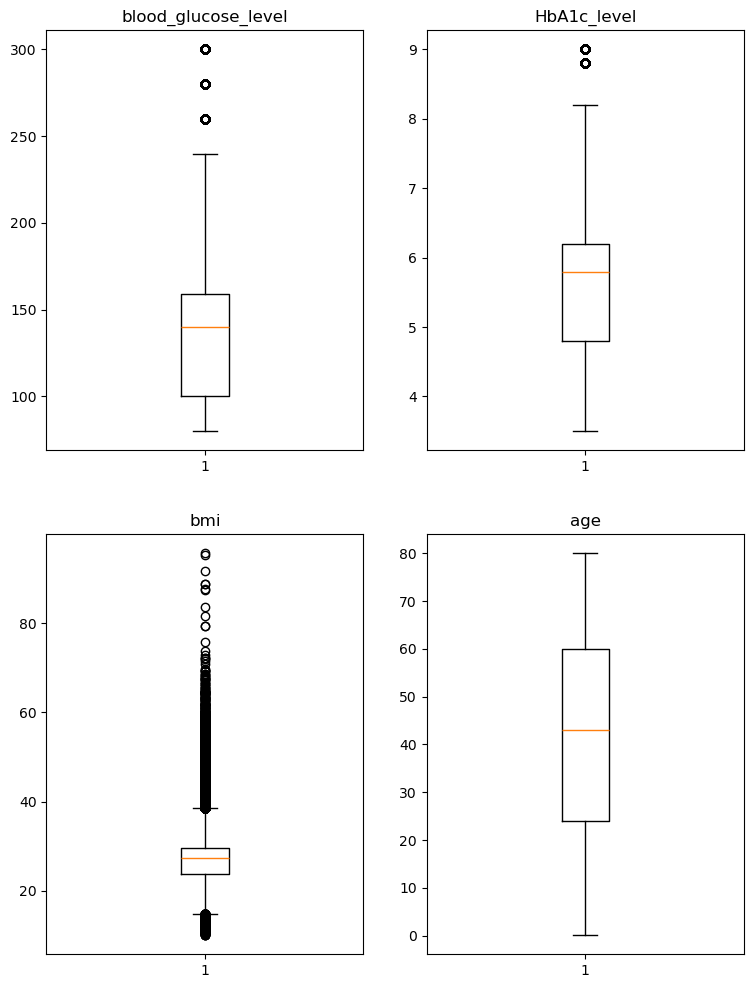

In [105]:
fig, ax = plt.subplots (2,2, figsize=(9,12))

ax[0,0].boxplot(x = 'blood_glucose_level', data= df)

ax[0,0].set_title("blood_glucose_level")

ax[0,1].boxplot(x = 'HbA1c_level', data= df)

ax[0,1].set_title("HbA1c_level")

ax[1,0].boxplot(x = 'bmi', data= df)

ax[1,0].set_title("bmi")

ax[1,1].boxplot(x = 'age', data= df)

ax[1,1].set_title("age")

<Axes: xlabel='blood_glucose_level'>

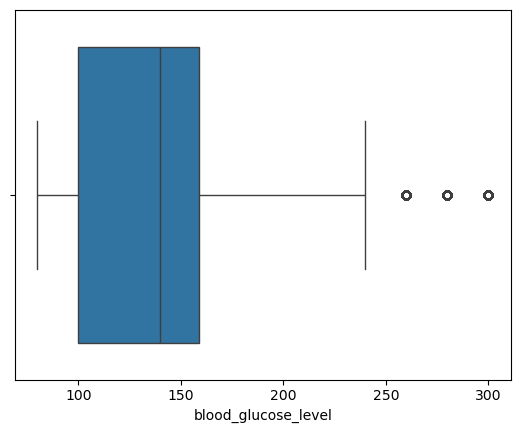

In [106]:
sns.boxplot(x = 'blood_glucose_level',data=df)

In [107]:
Q1 = df["blood_glucose_level"].quantile(0.25)
Q3 = df["blood_glucose_level"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

59.0


In [108]:
data = df[~((df["blood_glucose_level"] < (Q1 - 1.5 * IQR)) | (df["blood_glucose_level"] > (Q3 + 1.5 * IQR)))]

In [109]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


<Axes: xlabel='HbA1c_level'>

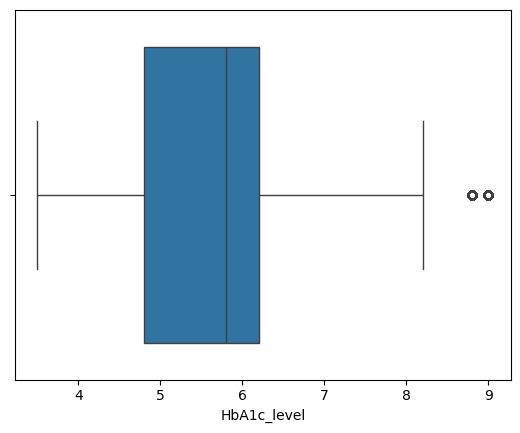

In [110]:
sns.boxplot(x = 'HbA1c_level',data=df)

In [118]:
Q1 = df["HbA1c_level"].quantile(0.25)
Q3 = df["HbA1c_level"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.4000000000000004


In [120]:
data = df[~((df["HbA1c_level"] < (Q1 - 1.5 * IQR)) | (df["HbA1c_level"] > (Q3 + 1.5 * IQR)))]

In [122]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


<Axes: xlabel='bmi'>

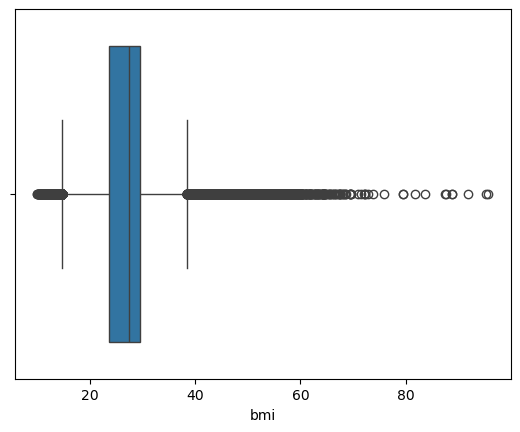

In [124]:
sns.boxplot(x = 'bmi',data=df)

In [126]:
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

5.949999999999999


In [128]:
data = df[~((df["bmi"] < (Q1 - 1.5 * IQR)) | (df["bmi"] > (Q3 + 1.5 * IQR)))]

In [130]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Feature Selection and Engineering

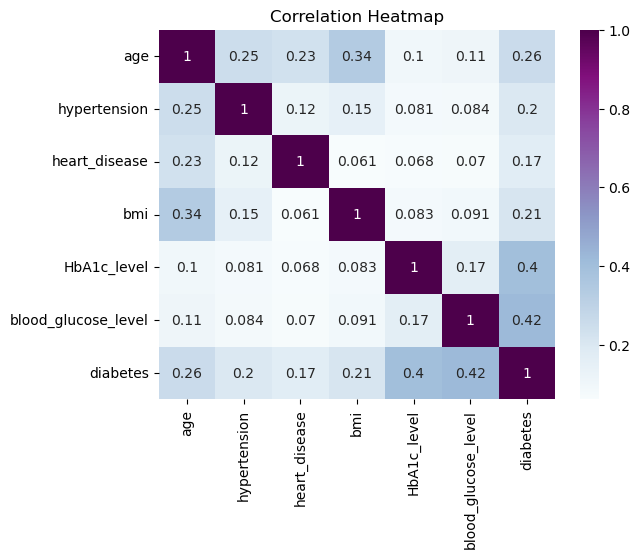

In [274]:
corr = df[['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level','diabetes']].corr()
sns.heatmap(corr,annot=True,cmap='BuPu')
plt.title('Correlation Heatmap')
plt.show()

##  Train-Test

In [136]:
from sklearn.model_selection import train_test_split

In [138]:
X = df.drop(columns=['diabetes'])
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [140]:
X_train.shape

(70000, 8)

In [142]:
X_test.shape

(30000, 8)

In [144]:
y_train.shape

(70000,)

In [146]:
y_test.shape

(30000,)

In [148]:
X_train.describe().round()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0
mean,42.0,0.0,0.0,27.0,6.0,138.0
std,22.0,0.0,0.0,7.0,1.0,41.0
min,0.0,0.0,0.0,10.0,4.0,80.0
25%,24.0,0.0,0.0,24.0,5.0,100.0
50%,43.0,0.0,0.0,27.0,6.0,140.0
75%,60.0,0.0,0.0,30.0,6.0,159.0
max,80.0,1.0,1.0,92.0,9.0,300.0


In [150]:
X_test.describe().round()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,42.0,0.0,0.0,27.0,6.0,138.0
std,23.0,0.0,0.0,7.0,1.0,41.0
min,0.0,0.0,0.0,10.0,4.0,80.0
25%,24.0,0.0,0.0,24.0,5.0,100.0
50%,43.0,0.0,0.0,27.0,6.0,140.0
75%,59.0,0.0,0.0,29.0,6.0,159.0
max,80.0,1.0,1.0,96.0,9.0,300.0


In [152]:
y_train.describe()

count    70000.000000
mean         0.085043
std          0.278947
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: diabetes, dtype: float64

In [154]:
y_test.describe()

count    30000.000000
mean         0.084900
std          0.278737
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: diabetes, dtype: float64

## Checking for Class Imbalance

In [225]:
x = df.drop(['diabetes'], axis=1)
y = df['diabetes']

In [227]:
y.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

<Axes: ylabel='count'>

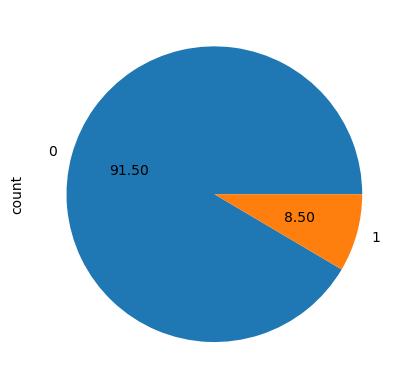

In [229]:
y.value_counts().plot.pie(autopct='%.2f')

### RandomUnderSampler

In [249]:
from imblearn.under_sampling import RandomUnderSampler

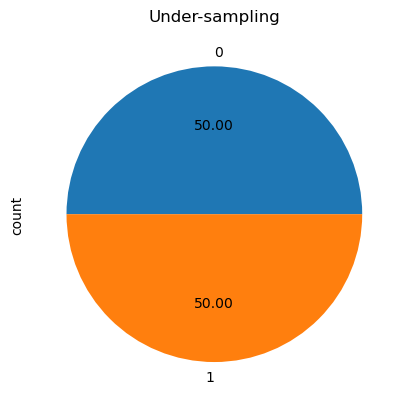

In [234]:
rus = RandomUnderSampler(sampling_strategy=1)
x_res,y_res = rus.fit_resample(x,y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("Under-sampling")

In [236]:
y_res.value_counts()

diabetes
0    8500
1    8500
Name: count, dtype: int64

### RandomOverSampler

In [238]:
from imblearn.over_sampling import RandomOverSampler

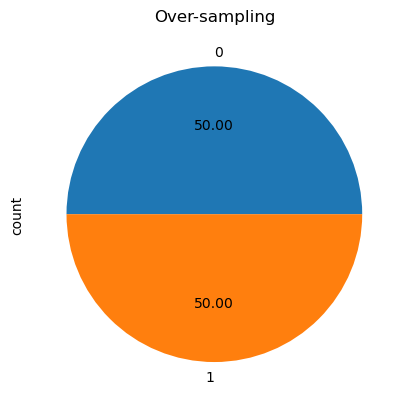

In [240]:
ros = RandomOverSampler(sampling_strategy="not majority")
x_res,y_res = ros.fit_resample(x,y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("Over-sampling")

In [242]:
y_res.value_counts()

diabetes
0    91500
1    91500
Name: count, dtype: int64